In [3]:
import torch
import torchvision
from torchvision import transforms, datasets
from torchvision.datasets import MNIST

In [8]:
new_mirror = 'https://ossci-datasets.s3.amazonaws.com/mnist'
datasets.MNIST.resources = [
   ('/'.join([new_mirror, url.split('/')[-1]]), md5)
   for url, md5 in datasets.MNIST.resources
]
train = datasets.MNIST(
   "../data", train=True, download=True, 
    transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("../data", train=False, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

In [9]:
train_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [10]:
for data in train_set:
    print(data)
    break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 

In [11]:
x, y = data[0][0], data[1][0]
print(y)

tensor(3)


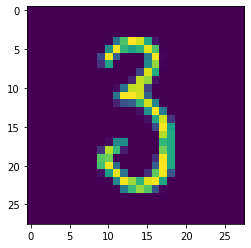

In [12]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [13]:
import torch.nn as nn
import torch.nn.functional as F

In [76]:
#images are size 28 x 28 = 784 total pixels
#64 is arbitrary
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 50)
        #input dimension must match the previous output dimension
        self.fc2 = nn.Linear(50, 30)
        self.fc3 = nn.Linear(30, 20)
        self.fc4 = nn.Linear(20, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.softmax(x, dim=1)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
)


In [24]:
X = torch.rand((28,28))
X = X.view(1, 28*28)
output = net(X)

In [25]:
output

tensor([[-2.1630, -2.3295, -2.3561, -2.3926, -2.1994, -2.1965, -2.4070, -2.3838,
         -2.3221, -2.3117]], grad_fn=<LogSoftmaxBackward>)

In [77]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in train_set:
        # data is in batches of features AND labels
        X, y = data
        optimizer.zero_grad()
        output = net(X.view(-1, 784))
        loss = F.cross_entropy(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(1.5251, grad_fn=<NllLossBackward>)
tensor(1.4612, grad_fn=<NllLossBackward>)
tensor(1.5618, grad_fn=<NllLossBackward>)


In [78]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_set:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
        
k=round(correct/total, 3)
print("Accuracy: ", k)

Accuracy:  0.94
